У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/ДЗ Python_07/data/yulu_rental.csv')

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

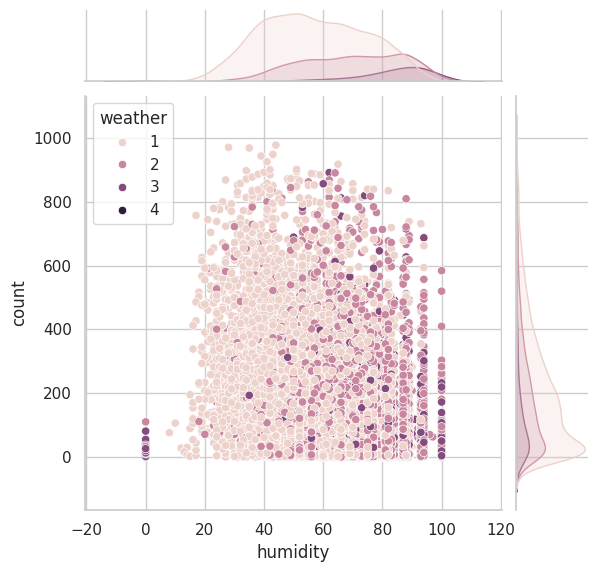

In [10]:
sns.set(style="whitegrid")
g = sns.jointplot(data=df, x='humidity', y='count', hue='weather')
plt.subplots_adjust(top=0.95)
plt.show()

In [ ]:
# Можна побачити, як певні погодні умови впливають на кількість велосипедів, взятих в оренду.
# Сонячна погода та малохмарна мають позитивний вплив, в той час як туман та сильний дощ можуть знижувати кількість орендарів.
# В які сезони вологість і кількість орендарів змінюється найбільше. Це може допомогти у плануванні сезонних заходів чи маркетингових кампаній,
# оптимізувати кількість велосипедів у гарну погоду і оптимізувати маркетингові заходи, наприклад скидки


2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

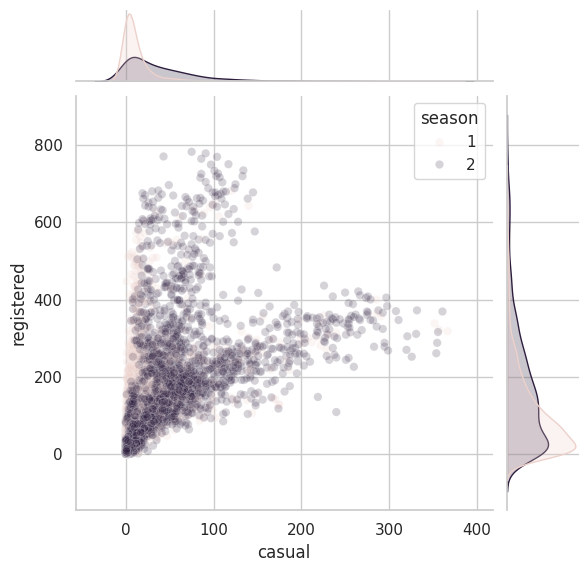

In [9]:
filtered_df = df[df['season'].isin([1, 2])]
sns.set(style="whitegrid")
g = sns.jointplot(data=filtered_df, x='casual', y='registered', hue='season', alpha=0.2)
plt.subplots_adjust(top=0.95)
plt.show()

In [ ]:
# На графіку можна побачити, як змінні співвідносяться між собою. Влітку при сприятливих погодних умовах неформальні користувачі стають зареєстрованими
# розробити більш ефективні маркетингові стратегії, спрямовані на залучення нових користувачів або утримання існуючих
# це може допомогти у плануванні ресурсів, таких як обслуговування велосипедів або управління парком велосипедів

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


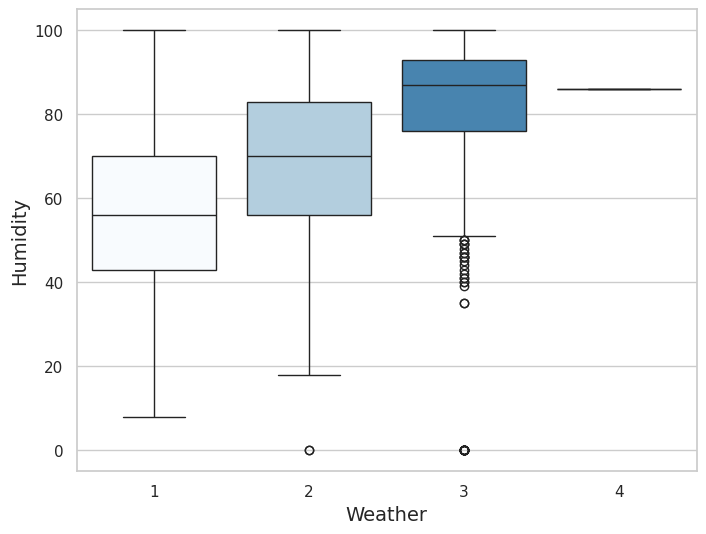

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='weather', y='humidity', data=df, hue='weather', palette='Blues', legend=False)
plt.xlabel('Weather', fontsize=14)
plt.ylabel('Humidity', fontsize=14);
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

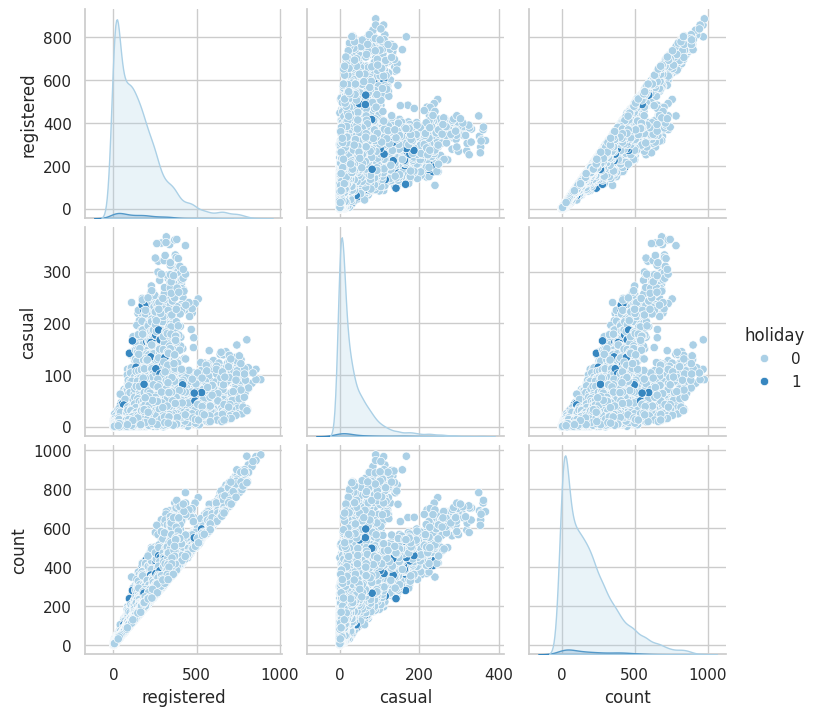

In [23]:
filtered_df = df[['registered', 'casual', 'count', 'holiday']]
sns.set(style="whitegrid")
pair_plot = sns.pairplot(filtered_df, hue='holiday', palette='Blues',)
plt.subplots_adjust(top=0.95)
plt.show()

In [ ]:
# На парних графіках можна побачити взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю взятих на прокат велосипедів
# у робочі дні користуються арендою більше користувачів

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [24]:
df['datetime'] = pd.to_datetime(df['datetime'])

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [25]:
df['date'] = df.datetime.dt.date

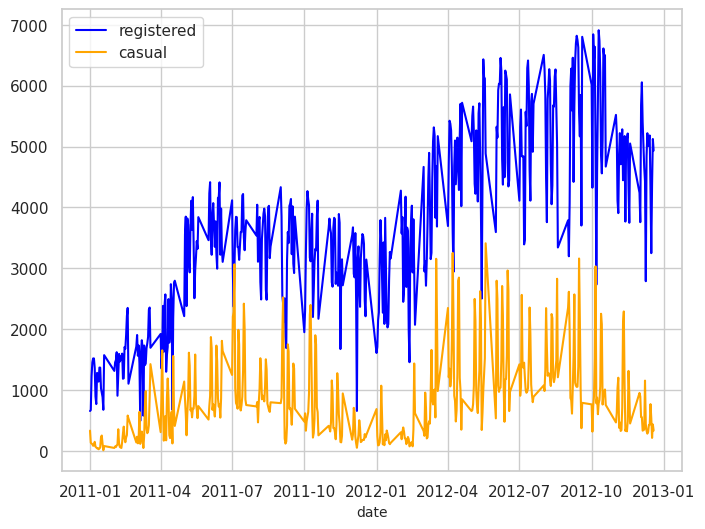

In [33]:
df_viz = df[['date', 'registered', 'casual']]
df_viz = df_viz.groupby('date').sum().reset_index()
plt.figure(figsize=(8, 6))
plt.plot(df_viz['date'], df_viz['registered'], label='registered', color='blue')
plt.plot(df_viz['date'], df_viz['casual'], label='casual', color='orange')
plt.xlabel('date', fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
